In [1]:
from gbdxtools import Interface, CatalogImage

In [2]:
# test gbdx connection is working
gbdx = Interface()


In [3]:
## specify the Catalog IDs for 416 fire
# (SWIR)
# Catalog ID 104A01003F55D000
# Sensor WV3_SWIR
# Resolution 7.5 m
# Acquisition Date 06-07-2018
# Off-Nadir 52.1°
# Sun Azimuth 123.6°
# Sun Elevation 67.1°
# Cloud Cover 3%
swir_id = '104A01003F55D000'

# (VNIR)
# Catalog ID 104001003F55D000
# Sensor WV3
# Resolution 30 cm (pansharpened though…)
# Acquisition Date 06-07-2018
# Off-Nadir 52.0°
# Sun Azimuth 123.5°
# Sun Elevation 67.2°
# Cloud Cover 3%
vnir_id = '104001003F55D000'

In [4]:
## try to load the CatalogImage. If it isn't available, order it
bad_id_wfs = []

## VNIR
order = False
try:
    img_vnir = CatalogImage(vnir_id)
except Exception as e:
    print(e)
    
    if order:
        # order it
        tasks = []

        # Pre-Image Auto ordering task parameters
        pre_order = gbdx.Task("Auto_Ordering")
        pre_order.inputs.cat_id = vnir_id
        pre_order.impersonation_allowed = True
        pre_order.persist = True
        pre_order.timeout = 36000
        tasks += [pre_order]

        # Set up workflow save data
        workflow = gbdx.Workflow(tasks)

        # Execute workflow
        workflow.execute()

        # append to list
        bad_id_wfs.append(workflow)

## SWIR    
try:
    img_vnir = CatalogImage(swir_id)
except Exception as e:
    print(e)
    
    # order it
    if order:
        tasks = []

        # Pre-Image Auto ordering task parameters
        pre_order = gbdx.Task("Auto_Ordering")
        pre_order.inputs.cat_id = swir_id
        pre_order.impersonation_allowed = True
        pre_order.persist = True
        pre_order.timeout = 36000
        tasks += [pre_order]

        # Set up workflow save data
        workflow = gbdx.Workflow(tasks)

        # Execute workflow
        workflow.execute()

        # append to list
        bad_id_wfs.append(workflow)





Could not find a catalog entry for the given id: 104001003F55D000
Could not find a catalog entry for the given id: 104A01003F55D000


In [7]:
## used postman Workflows>Search to get running workflows
wf_dict = {
    "Workflows": [
        "4930988786209417903",
        "4930988793190693727"
    ]
}

In [12]:
bad_id_wfs = []
for bid in wf_dict['Workflows']:
    workflow = gbdx.Workflow( [] )  # instantiate a blank workflow
    workflow.id = bid
    bad_id_wfs.append(workflow)


In [17]:
## check status for items in bad_id_wfs
for bid in bad_id_wfs:
    print(bid.id, bid.status)

4930988786209417903 {'state': 'complete', 'event': 'succeeded'}
4930988793190693727 {'state': 'complete', 'event': 'succeeded'}


In [22]:
## once workflows are completed, generate CatalogImage
img_vnir = CatalogImage(vnir_id)
img_swir = CatalogImage(swir_id)

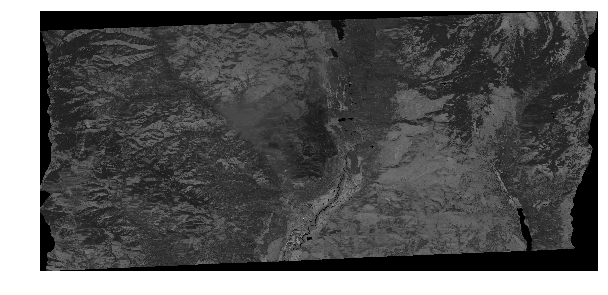

In [23]:
img_swir.plot()

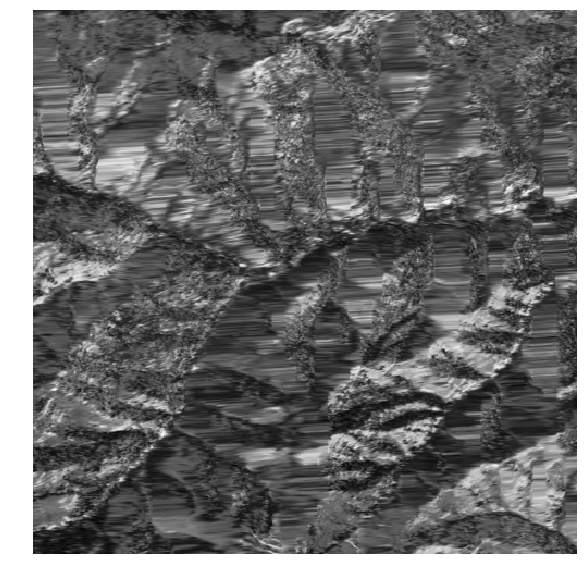

(500, 500)

In [31]:
img_swir[[1,2,3],500:1000, 500:1000].plot()
img_swir[0,500:1000, 500:1000].shape